In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.preprocessing import Imputer
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split
from sklearn import linear_model

DATA_FILE_NAME = "ProcessedData.csv"
df = pd.read_csv(DATA_FILE_NAME)
df.head()

,OutcomeType,isPurebred,AnimalType_Cat,AnimalType_Dog,SexuponOutcome_Female,SexuponOutcome_Male,SexuponOutcome_Unknown,AgeuponOutcome_Adolescent,AgeuponOutcome_Adult,AgeuponOutcome_Baby,...,Color_Silver Lynx Point,Color_Silver Tabby,Color_Tan,Color_Torbie,Color_Tortie,Color_Tortie Point,Color_Tricolor,Color_White,Color_Yellow,Color_Yellow Brindle
0,1,0,0,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,3,0,1,0,1,0,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0,0,0,1,0,1,0,1,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
3,2,0,1,0,0,1,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2,0,0,1,0,1,0,1,0,0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [2]:
totalTrainingSet, totalTestSet = train_test_split(df,test_size=.2)
len(totalTrainingSet)

21383

In [3]:
len(totalTestSet)

5346

In [14]:
fold = KFold(n_splits = 5)
arr = []
## KNN
from sklearn.neighbors import KNeighborsClassifier  
classifier = KNeighborsClassifier(n_neighbors=6, metric='jaccard')  

for i in range(0,5):
    split = next(fold.split(totalTrainingSet), None)
    train = totalTrainingSet.iloc[split[0]]
    validate = totalTrainingSet.iloc[split[1]]
    
    ##training/testing
    
    X_train=train.iloc[:,1:]
    y_train=train.iloc[:,0]
    
    X_validate = validate.iloc[:,1:]
    y_validate=validate.iloc[:,0]
    
    model = classifier.fit(X_train, y_train)
    model.predict_proba(X_validate)
    score=model.score(X_validate, y_validate)
    ##end
    
    arr.append(score)
arr

[0.6114098667290156,
 0.6114098667290156,
 0.6114098667290156,
 0.6114098667290156,
 0.6114098667290156]

In [18]:
class_names=['Adoption','Return to owner','Transfer','Euthanasia','Died']

In [19]:
X_test=totalTestSet.iloc[:,1:]
y_test=totalTestSet.iloc[:,0]
y_pred = classifier.predict(X_test)  

In [20]:
score=model.score(X_test, y_test)
score

0.6118593340815563

In [21]:
from sklearn.metrics import classification_report, confusion_matrix  
print(confusion_matrix(y_test, y_pred))  
print(classification_report(y_test, y_pred))  

[[1792  212  161    8    0]
 [ 480  336  134   15    0]
 [ 549  166 1120   17    0]
 [  77   65  153   23    0]
 [   4    4   30    0    0]]
              precision    recall  f1-score   support

           0       0.62      0.82      0.71      2173
           1       0.43      0.35      0.38       965
           2       0.70      0.60      0.65      1852
           3       0.37      0.07      0.12       318
           4       0.00      0.00      0.00        38

   micro avg       0.61      0.61      0.61      5346
   macro avg       0.42      0.37      0.37      5346
weighted avg       0.59      0.61      0.59      5346



C:\Users\Public\Empty\lib\site-packages\sklearn\metrics\classification.py:1143: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


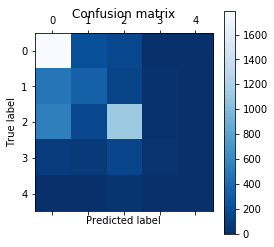

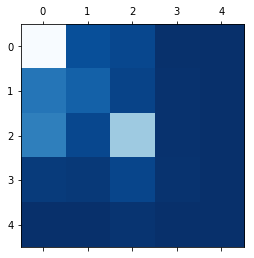

In [24]:
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm, cmap=plt.cm.Blues_r)
plt.title('Confusion matrix')
plt.colorbar()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.matshow(cm, cmap=plt.cm.Blues_r)
plt.show()

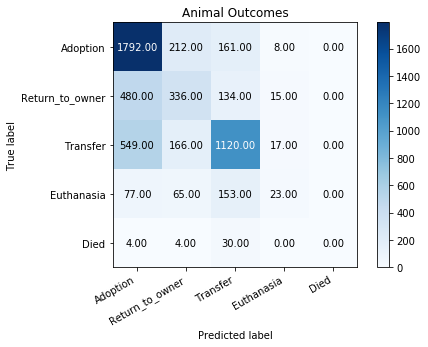

In [25]:
classes = ['Adoption','Return_to_owner','Transfer','Euthanasia','Died']
plt.rcParams["figure.figsize"] = (7,5)
normalize = True
cm =confusion_matrix(y_test,y_pred)

fig, ax = plt.subplots()
im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
ax.figure.colorbar(im, ax=ax)
# We want to show all ticks...
ax.set(xticks=np.arange(cm.shape[1]),
       yticks=np.arange(cm.shape[0]),
       # ... and label them with the respective list entries
       xticklabels=classes, yticklabels=classes,
       title= "Animal Outcomes",
       ylabel='True label',
       xlabel='Predicted label')
fmt = '.2f' if normalize else 'd'
thresh = cm.max() / 2.
for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        ax.text(j, i, format(cm[i, j], fmt),
                ha="center", va="center",
                color="white" if cm[i, j] > thresh else "black")
fig.autofmt_xdate()
plt.savefig('MLR_Confusion_Matrix')